# Predicting human dopamine D1 receptor antagonists using 13C NMR spectroscopy data

## Content   <a name="content"></a>

1. [Upload and analyse NMR spectroscopy data](#1)
2. [Create a dataframe merging the NMR data frame to the data frame holding the labels](#2)
3. [Ensure an equal number of classes in the test sets](#3)
4. [Scaling](#4)
5. [Balancing](#5)
6. [Machine Learning](#6)
7. [Five-fold cross validation](#7)
8. [Scrutinise for overfitting of the MLmodel with default hyperparameter values (kernel='rbf', C=1.0, gamma=’scale’)](#8)
9. [Hyperparameter tuning with Optuna](#9)
10. [Scrutinise for overfitting using hyperparameter tuned by Optuna](#10)
11. [Plot the AUROC](#11)
12. [Confusion matrix](#12)
13. [MCC](#13)
14. [Classification report](#14)

## Upload and analyse NMR spectroscopy data <a name="1"></a>

In [1]:
import pandas as pd 

# load the converted nmr dataset
df_nmr = pd.read_csv('output.csv')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df_nmr: ', df_nmr.shape)
df_nmr.head()

Shape of df_nmr:  (59565, 301)


,CID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,5014398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2811632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20914080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9583315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1916664,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [2]:
# Identify columns with only zeros
columns_to_drop = df_nmr.columns[df_nmr.eq(0).all()]

In [3]:
# Drop the columns
df_nmr = df_nmr.drop(columns_to_drop, axis=1)

In [4]:
# Display the data frame
print('Shape of df_nmr: ', df_nmr.shape)
df_nmr.head()

Shape of df_nmr:  (59565, 222)


,CID,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,219,220,222,233,299
0,5014398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2811632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20914080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9583315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1916664,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# load the dataset with targets
df_targets = pd.read_csv('input/targets.csv')

# Display the data frame
print('Shape of df_targets: ', df_targets.shape)
df_targets.head()

Shape of df_targets:  (59608, 3)


,CID,target,Activity at 10.0 uM
0,2176767,0,-29.9982
1,2134766,0,-29.9874
2,802924,0,-29.9864
3,4214295,0,-29.9809
4,3222855,0,-29.9777


[<a href="#content">Back to top</a>]

## Create a dataframe merging the NMR data frame to the data frame holding the labels  <a name="2"></a>

In [6]:
# Merge the target and nmr data 
df = pd.merge( df_nmr, df_targets, on='CID', how='inner')

In [7]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (59567, 224)


,CID,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,219,220,222,233,299,target,Activity at 10.0 uM
0,5014398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.2996
1,2811632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-31.2015
2,20914080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.6901
3,9583315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.6697
4,1916664,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0684


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59567 entries, 0 to 59566
Columns: 224 entries, CID to Activity at 10.0 uM
dtypes: float64(1), int64(223)
memory usage: 101.8 MB


In [9]:
df.drop(columns=['CID', 'Activity at 10.0 uM'], axis=1, inplace=True)

In [10]:
unique_count = df['target'].unique()
print("The unique values in column 'target:", unique_count)

The unique values in column 'target: [0 1]


In [11]:
# # Drop rows with any NaN values
# df = df.dropna()

In [12]:
# Count each of the binary targets
df['target'].value_counts()

target
0    48348
1    11219
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Ensure an equal number of classes in the test sets <a name="3"></a>

In [13]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 2800 samples (10% of 28000 samples) of target 1 for the test set
df_1_test = df_1.iloc[:2733]

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[2733:]

In [14]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract every nth row (e.g., every 2nd row)
n = 3
df_0 = df_0[df_0.index % n == 0] 

df_0.shape

(16116, 222)

In [15]:
# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

## Extract 2800 samples (10% of 28000 samples) of target 0 for the test set Extract 10% of target 1 for the test set
df_0_test = df_0.iloc[:2733]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[2733:]

In [16]:
# Create train and test dataframe for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [17]:
# Create the sets for ML 
X_train = train.drop(columns='target' , axis=1)
y_train = train['target']

X_test =  test.drop(columns='target' , axis=1)
y_test = test['target']

In [18]:
# Create X and y datasets to use for cross-validation
X = pd.concat([X_train, X_test]) 
y = pd.concat([y_train, y_test]) 

In [19]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
0    2733
1    2733
Name: count, dtype: int64

In [20]:
# Keeping sets for the cross validation  
X_cv = X_train.reset_index(drop=True)
y_cv = y_train.reset_index(drop=True)

In [21]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (21869, 221)
X_test:   (5466, 221)
y_train:  (21869,)
y_test:   (5466,)


[<a href="#content">Back to top</a>]

## Scaling <a name="4"></a>

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (21869, 221)
X_test:   (5466, 221)
y_train:  (21869,)
y_test:   (5466,)


[<a href="#content">Back to top</a>]

## Balancing <a name="5"></a>

[(0, 13383), (1, 8486)]


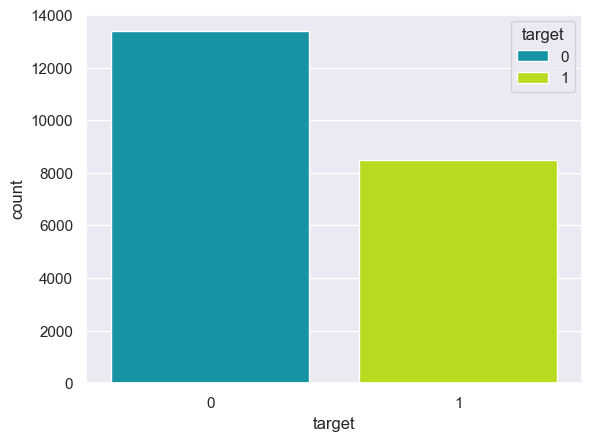

In [23]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the imbalance between the targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 13383), (1, 13383)]


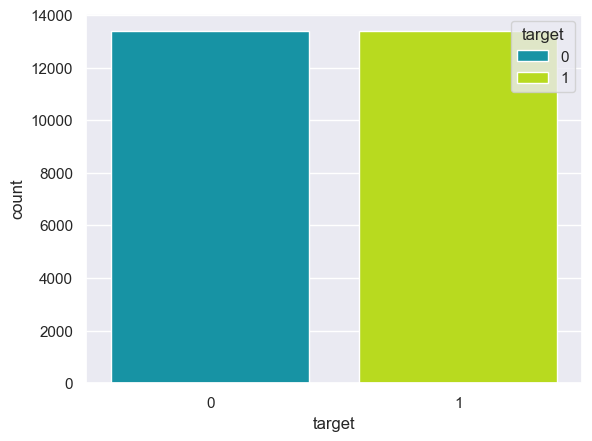

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

# Plot the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [25]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (26766, 221)
X_test:   (5466, 221)
y_train:  (26766,)
y_test:   (5466,)


[<a href="#content">Back to top</a>]

## Machine Learning <a name="6"></a>

In [26]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0),
       "K-nearest": KNeighborsClassifier(n_neighbors=3)}

In [27]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
0,SVM,0.714,0.771,0.610,0.681,0.714
4,XGBoost,0.694,0.736,0.604,0.663,0.694
3,GradientBoost,0.665,0.694,0.591,0.639,0.665
2,RandomForest,0.664,0.810,0.428,0.560,0.664
5,K-nearest,0.604,0.657,0.435,0.523,0.604
1,Decision,0.581,0.605,0.467,0.527,0.581


[<a href="#content">Back to top</a>]

## # Statistical significance between SVM and XGBC

In [28]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.sparse import csr_matrix
import sys

# Set random seed for reproducibility
np.random.seed(42)

# Global configuration for memory optimization
# Use float32 for feature columns instead of default float64 (saves half the memory)
FEATURE_DTYPE = np.float32 
TARGET_COLUMN = 'target'

# Utility Function for Memory Check
def get_memory_usage(obj):
    """Calculates memory used by a numpy or pandas object in MiB."""
    return sys.getsizeof(obj) / (1024**2)

# Core Logic Functions (remain largely unchanged, now handle sparse input)
def train_and_predict(X_train, X_test, y_train, y_test):
    """Trains two models and generates predictions on the shared test set."""
    print("\n--- 2. Model Training and Prediction ---")
    
    # Model A: Gradient Boosting Classifier
    # Note: GBC will internally convert sparse matrix to dense if it doesn't support sparse, 
    # but we proceed assuming the memory savings on X_test/X_train storage is the main goal.

    # XGBoost handles sparse input efficiently.
    try:
        model_A = SVC(random_state=42)
        model_A.fit(X_train, y_train)
        y_pred_A = model_A.predict(X_test)
        acc_A = accuracy_score(y_test, y_pred_A)
        print(f"Model A (SVC) Accuracy: {acc_A:.4f}")
    except Exception as e:
        print(f"⚠️ Model A (GBC) training failed (often due to sparse data). Skipping. Error: {e}")
        y_pred_A = np.zeros_like(y_test)
        acc_A = 0.0

    # Model B: XGBoost Classifier
    try:
        model_B = XGBClassifier(random_state=42, verbosity=0)
        model_B.fit(X_train, y_train)
        y_pred_B = model_B.predict(X_test)
        acc_B = accuracy_score(y_test, y_pred_B)
        print(f"Model B (RandomForestClassifier) Accuracy: {acc_B:.4f}")
    except Exception as e:
        print(f"⚠️ Model B (RandomForestClassifier) training failed. Skipping. Error: {e}")
        y_pred_B = np.zeros_like(y_test)
        acc_B = 0.0
        
    return y_pred_A, y_pred_B

def perform_mcnemar_test(y_true, y_pred_A, y_pred_B, alpha=0.05):
    """
    Performs McNemar's Test to statistically compare two models.
    """
    print("\n--- 3. Statistical Comparison (McNemar's Test) ---")
    
    # Check for valid predictions (needed if a model failed training)
    if not np.any(y_pred_A) or not np.any(y_pred_B):
        print("Cannot perform McNemar's test: One or both models failed to generate predictions.")
        return

    # n_01: Count where Model A was CORRECT and Model B was WRONG
    n_01 = np.sum((y_pred_A == y_true) & (y_pred_B != y_true))
    
    # n_10: Count where Model A was WRONG and Model B was CORRECT
    n_10 = np.sum((y_pred_A != y_true) & (y_pred_B == y_true))
    
    # Calculate the full 2x2 table for statsmodels
    n_00 = np.sum((y_pred_A == y_true) & (y_pred_B == y_true))
    n_11 = np.sum((y_pred_A != y_true) & (y_pred_B != y_true))
    
    contingency_table = np.array([[n_00, n_01],
                                  [n_10, n_11]])
    
    print(f"Disagreement Counts (A Correct/B Wrong): n_01 = {n_01}")
    print(f"Disagreement Counts (A Wrong/B Correct): n_10 = {n_10}")
    
    # Perform the test
    # Use 'chisquare' which is equivalent to 'exact=False' for large N
    # result = mcnemar(contingency_table, method='chisquare') 
    result = mcnemar(contingency_table, exact=False)
    p_value = result.pvalue

    # Interpret the Results
    print(f"\nSignificance Level (alpha): {alpha}")
    print(f"McNemar's Test P-value: {p_value:.4f}")
    
    if p_value < alpha:
        conclusion = "The difference in performance is **STATISTICALLY SIGNIFICANT**."
        if n_01 > n_10:
            conclusion += " (Model A is significantly better than Model B.)"
        else:
            conclusion += " (Model B is significantly better than Model A.)"
    else:
        conclusion = "The difference in performance is **NOT STATISTICALLY SIGNIFICANT**."
        conclusion += " (The observed difference is likely due to random chance.)"

    print("\nConclusion:")
    print(conclusion)

# Main Execution Block with Memory Optimizations
if __name__ == '__main__':
    print("--- 1. Data Preparation and Split (Memory Optimized) ---")
    # y_true is just the true labels from the test set
    y_true = y_test 
    
    print(f"Total Samples: {X.shape[0]}")
    print(f"Total Features: {X.shape[1]}")
    print(f"Training Samples: {X_train.shape[0]}")
    print(f"Testing Samples (Shared Test Set): {X_test.shape[0]}")
    
    # Train and Get Predictions
    y_pred_A, y_pred_B = train_and_predict(X_train, X_test, y_train, y_test) 
    
    # Perform Statistical Comparison
    perform_mcnemar_test(y_true, y_pred_A, y_pred_B)

--- 1. Data Preparation and Split (Memory Optimized) ---
Total Samples: 27335
Total Features: 221
Training Samples: 26766
Testing Samples (Shared Test Set): 5466

--- 2. Model Training and Prediction ---
Model A (SVC) Accuracy: 0.7144
Model B (RandomForestClassifier) Accuracy: 0.6936

--- 3. Statistical Comparison (McNemar's Test) ---
Disagreement Counts (A Correct/B Wrong): n_01 = 554
Disagreement Counts (A Wrong/B Correct): n_10 = 440

Significance Level (alpha): 0.05
McNemar's Test P-value: 0.0003

Conclusion:
The difference in performance is **STATISTICALLY SIGNIFICANT**. (Model A is significantly better than Model B.)


[<a href="#content">Back to top</a>]

## Five-fold cross-validation  <a name="7"></a>

In [29]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# Print the proportion
print(f"Original dataset shape (from df): X={X.shape}, y={y.shape}")
# FIX 4: Print original dataset class distribution using y directly
print(f"Original full dataset class distribution (0: Majority, 1: Minority): {np.bincount(y)}")
print(f"Original full dataset class proportions:\n{y.value_counts(normalize=True)}\n")

print(f"Cross-validation (CV) set shape: X_cv={X_cv.shape}, y_cv={y_cv.shape}")
print(f"CV set class distribution (0: Majority, 1: Minority): {np.bincount(y_cv)}")
print(f"CV set class proportions:\n{y_cv.value_counts(normalize=True)}\n")


# Instantiate the model
model = SVC(probability=True, random_state=42, class_weight='balanced')

# Number of folds
n_splits = 5

# Stratified K-Fold ensures balanced class distribution in each fold for CV
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store metrics from each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Cross-Validation Loop with Resampling
print(f"Performing {n_splits}-Fold Stratified Cross-Validation with RandomOverSampler...\n")

for fold, (train_index, test_index) in enumerate(skf.split(X_cv, y_cv)):
    print(f"--- Fold {fold + 1}/{n_splits} ---")

    # Split data for the current fold (from the CV set, which is X_train_scaled)
    X_train_fold, X_test_fold = X_cv.iloc[train_index], X_cv.iloc[test_index]
    y_train_fold, y_test_fold = y_cv.iloc[train_index], y_cv.iloc[test_index]

    # StratifiedKFold ensures similar distribution in train/test for each fold
    print(f"  Training fold class distribution: {np.bincount(y_train_fold)}")
    print(f"  Test fold class distribution: {np.bincount(y_test_fold)}")
    print(f"  Test fold class proportions:\n{y_test_fold.value_counts(normalize=True)}\n")


    # The above defined resample rus will be use for resampling strategy ONLY to the training fold.
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_fold, y_train_fold)

    print(f"  Training fold (after RandomOverSampler) class distribution: {np.bincount(y_train_resampled)}")

    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the *original, untouched* test data for the current fold
    y_pred_fold = model.predict(X_test_fold)
    y_prob_fold = model.predict_proba(X_test_fold)[:, 1] # Probability for the positive class (class 1)

    # Evaluate performance for the current fold
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
    recall = recall_score(y_test_fold, y_pred_fold, zero_division=0)
    f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
    roc_auc = roc_auc_score(y_test_fold, y_prob_fold)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Confusion Matrix:\n{confusion_matrix(y_test_fold, y_pred_fold)}\n")
    # print(classification_report(y_test_fold, y_pred_fold)) # Can print full report per fold
    print("-" * 30)


# Aggregate and Report Final Metrics
print("\n--- Cross-Validation Results Summary ---")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f} +/- {np.std(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f} +/- {np.std(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f} +/- {np.std(recall_scores):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f} +/- {np.std(f1_scores):.4f}")
print(f"Average ROC AUC: {np.mean(roc_auc_scores):.4f} +/- {np.std(roc_auc_scores):.4f}")

# Convert lists to NumPy arrays for easier manipulation (e.g., if you want to save them)
all_scores = {
    'accuracy': np.array(accuracy_scores),
    'precision': np.array(precision_scores),
    'recall': np.array(recall_scores),
    'f1_score': np.array(f1_scores),
    'roc_auc': np.array(roc_auc_scores)
}

Original dataset shape (from df): X=(27335, 221), y=(27335,)
Original full dataset class distribution (0: Majority, 1: Minority): [16116 11219]
Original full dataset class proportions:
target
0    0.589574
1    0.410426
Name: proportion, dtype: float64

Cross-validation (CV) set shape: X_cv=(21869, 221), y_cv=(21869,)
CV set class distribution (0: Majority, 1: Minority): [13383  8486]
CV set class proportions:
target
0    0.611962
1    0.388038
Name: proportion, dtype: float64

Performing 5-Fold Stratified Cross-Validation with RandomOverSampler...

--- Fold 1/5 ---
  Training fold class distribution: [10706  6789]
  Test fold class distribution: [2677 1697]
  Test fold class proportions:
target
0    0.612026
1    0.387974
Name: proportion, dtype: float64

  Training fold (after RandomOverSampler) class distribution: [10706 10706]
  Accuracy: 0.7417
  Precision: 0.6809
  Recall: 0.6288
  F1-Score: 0.6538
  ROC AUC: 0.7791
  Confusion Matrix:
[[2177  500]
 [ 630 1067]]

----------------

[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the ML model with its default hyperparameter values (kernel='rbf', gamma=’scale’) <a name="8"></a>

C: 0.001, Train Balanced Acc: 0.609, Test Balanced Acc: 0.595
C: 0.010, Train Balanced Acc: 0.643, Test Balanced Acc: 0.632
C: 0.100, Train Balanced Acc: 0.720, Test Balanced Acc: 0.686
C: 1.000, Train Balanced Acc: 0.861, Test Balanced Acc: 0.714
C: 10.000, Train Balanced Acc: 0.976, Test Balanced Acc: 0.678
C: 100.000, Train Balanced Acc: 1.000, Test Balanced Acc: 0.659
C: 1000.000, Train Balanced Acc: 1.000, Test Balanced Acc: 0.653


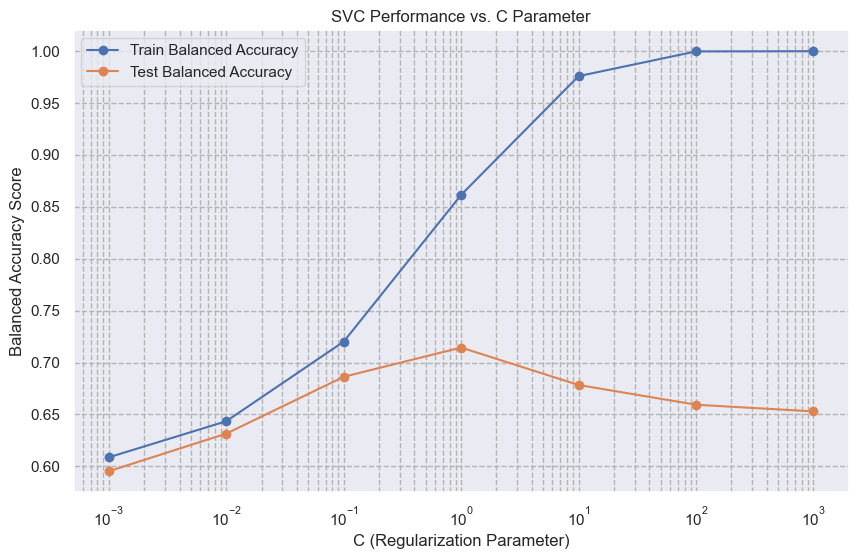


Train Scores for different C values: [0.6087200179331989, 0.6434655906747366, 0.7200926548606441, 0.8614286781738025, 0.9757901815736383, 0.9995890308600464, 0.9997758350145707]
Test Scores for different C values: [0.5953165020124406, 0.6315404317599707, 0.686242224661544, 0.7144163922429565, 0.6783754116355654, 0.659348701061105, 0.6529454811562385]


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

# Initialize lists to store scores
train_scores, test_scores = list(), list()

# Define the C values to evaluate
# SVC's 'C' parameter (regularization strength) is analogous to depth in controlling complexity.
# Uuse a logarithmic scale for C, as its effect is often exponential.
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # Common range for C values

# Evaluate SVC for each C value
for c_val in c_values:
    # Configure the model (SVC).
    # Use class_weight='balanced' for imbalanced data.
    model_ = SVC(C=c_val, kernel='rbf', gamma='scale',
                 class_weight='balanced')

    # No need of scaling because the data is bnary

    # Fit model_ on the training dataset
    model_.fit(X_train, y_train)

    # Evaluate on the train dataset
    train_yhat = model_.predict(X_train)
    # Use balanced_accuracy_score for imbalanced data
    train_acc = balanced_accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # Evaluate on the test dataset
    test_yhat = model_.predict(X_test)
    # Use balanced_accuracy_score for imbalanced data
    test_acc = balanced_accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # Summarize progress
    print('C: %.3f, Train Balanced Acc: %.3f, Test Balanced Acc: %.3f' % (c_val, train_acc, test_acc))

# Plot the results ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(c_values, train_scores, '-o', label='Train Balanced Accuracy')
plt.plot(c_values, test_scores, '-o', label='Test Balanced Accuracy')
plt.xscale('log') # C values are often plotted on a log scale
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Balanced Accuracy Score')
plt.title('SVC Performance vs. C Parameter')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

print("\nTrain Scores for different C values:", train_scores)
print("Test Scores for different C values:", test_scores)

C: 0.150, Train Balanced Acc: 0.738, Test Balanced Acc: 0.691
C: 0.200, Train Balanced Acc: 0.755, Test Balanced Acc: 0.696
C: 0.250, Train Balanced Acc: 0.767, Test Balanced Acc: 0.700
C: 0.300, Train Balanced Acc: 0.778, Test Balanced Acc: 0.703


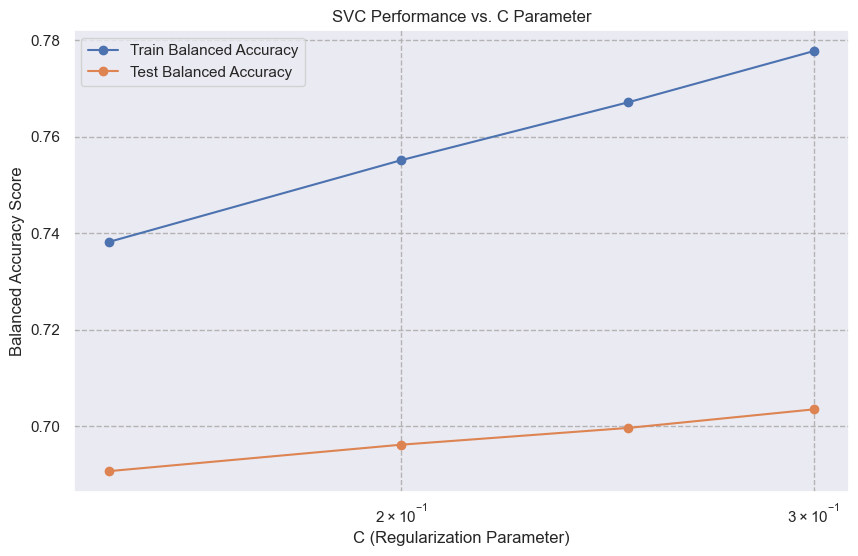


Train Scores for different C values: [0.7381752970186057, 0.755137114249421, 0.7671299409698871, 0.7777404169468729]
Test Scores for different C values: [0.6906330040248811, 0.6961214782290523, 0.6995975118916942, 0.703439443834614]


In [31]:
# Initialize lists to store scores
train_scores, test_scores = list(), list()

# Define the C values to evaluate
# SVC's 'C' parameter (regularization strength) is analogous to depth in controlling complexity.
# Uuse a logarithmic scale for C, as its effect is often exponential.
c_values = [0.15, 0.2, 0.25, 0.3] # Common range for C values

# Evaluate SVC for each C value
for c_val in c_values:
    # Configure the model (SVC).
    # Use class_weight='balanced' for imbalanced data.
    model_ = SVC(C=c_val, kernel='rbf', gamma='scale',
                 class_weight='balanced')

    # No need of scaling because the data is bnary

    # Fit model_ on the training dataset
    model_.fit(X_train, y_train)

    # Evaluate on the train dataset
    train_yhat = model_.predict(X_train)
    # Use balanced_accuracy_score for imbalanced data
    train_acc = balanced_accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # Evaluate on the test dataset
    test_yhat = model_.predict(X_test)
    # Use balanced_accuracy_score for imbalanced data
    test_acc = balanced_accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # Summarize progress
    print('C: %.3f, Train Balanced Acc: %.3f, Test Balanced Acc: %.3f' % (c_val, train_acc, test_acc))

# Plot the results ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(c_values, train_scores, '-o', label='Train Balanced Accuracy')
plt.plot(c_values, test_scores, '-o', label='Test Balanced Accuracy')
plt.xscale('log') # C values are often plotted on a log scale
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Balanced Accuracy Score')
plt.title('SVC Performance vs. C Parameter')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

print("\nTrain Scores for different C values:", train_scores)
print("Test Scores for different C values:", test_scores)

In [37]:
# # ML 
# Instantiate the final model
model = SVC(C=0.19, kernel='rbf', gamma='scale',
            class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.696
Precision:  0.713
Recall:  0.657
F1:  0.684
ROC:  0.696


In [38]:
from sklearn.model_selection import cross_val_score

# Calculate training accuracy using cross-validation
train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
train_accuracy = train_scores.mean()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Example threshold, adjust as needed
    print("Warning: Potential overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
else:
    print("No significant overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)

No significant overfitting detected.
Train accuracy: 0.71052824843243
Test accuracy: 0.6959385290889133


[<a href="#content">Back to top</a>]

## Hyperparameter tuning with Optuna <a name="9"></a>

In [39]:
import optuna
import sklearn.svm as svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score

# Define the objective function for Optuna
def objective(trial):
    """
    Defines the objective function for Optuna to minimize.
    The goal is to maximize the accuracy of the SVC model.
    """
    # Suggest hyperparameters to the trial
    # Correctly suggest C and tol
    # C = trial.suggest_float('C', 1e-5, 1e2, log=True)
    C = 0.19
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    shrinking = trial.suggest_categorical('shrinking', [True, False])
    tol = trial.suggest_float('tol', 1e-6, 1e-3, log=True)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    probability = trial.suggest_categorical('probability', [True, False])

    # Initialize the SVC model with the suggested hyperparameters
    model = svm.SVC(
        C=C,
        kernel=kernel,
        gamma=gamma,
        shrinking=shrinking,
        tol=tol,
        class_weight=class_weight,
        probability=probability,
        random_state=42 # for reproducibility
    )

    # Cross-validation to evaluate the model on the training data
    scores = model_selection.cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3, scoring='accuracy')

    # Return the mean cross-validation score (Optuna will try to maximize this)
    return scores.mean()

# Prepare the dataset and perform a train-test split
if __name__ == '__main__':

    # Create and run the Optuna study
    study = optuna.create_study(direction='maximize')
    
    print('Starting the hyperparameter optimization...')
    study.optimize(objective, n_trials=25)

    # Print the best trial's results
    print('\nOptimization finished.')
    print(f'Best trial: {study.best_trial.value:.4f} accuracy')
    print('Best parameters:')
    for key, value in study.best_trial.params.items():
        print(f'    {key}: {value}')

    # Get the best model and train it on the entire training dataset
    best_params = study.best_trial.params
    best_svc_model = svm.SVC(**best_params, random_state=42)
    best_svc_model.fit(X_train, y_train)

    # 6. Evaluate the best model on the held-out test set
    test_accuracy = best_svc_model.score(X_test, y_test)
    print(f"\nAccuracy of the best model on the held-out test set: {test_accuracy:.4f}")

[I 2026-02-07 00:44:12,548] A new study created in memory with name: no-name-7c59b5db-6015-40cc-a813-d7272a4bb8f2


Starting the hyperparameter optimization...


[I 2026-02-07 00:52:21,546] Trial 0 finished with value: 0.5990062018979302 and parameters: {'kernel': 'poly', 'gamma': 'auto', 'shrinking': True, 'tol': 0.00010605120590380459, 'class_weight': 'balanced', 'probability': True}. Best is trial 0 with value: 0.5990062018979302.
[I 2026-02-07 00:59:36,358] Trial 1 finished with value: 0.7011880744227752 and parameters: {'kernel': 'sigmoid', 'gamma': 'auto', 'shrinking': True, 'tol': 1.1769177196651344e-06, 'class_weight': None, 'probability': True}. Best is trial 1 with value: 0.7011880744227752.
[I 2026-02-07 01:08:24,362] Trial 2 finished with value: 0.7041395800642606 and parameters: {'kernel': 'rbf', 'gamma': 'scale', 'shrinking': False, 'tol': 3.4247459543862013e-06, 'class_weight': 'balanced', 'probability': True}. Best is trial 2 with value: 0.7041395800642606.
[I 2026-02-07 01:10:10,839] Trial 3 finished with value: 0.5965777478891131 and parameters: {'kernel': 'poly', 'gamma': 'scale', 'shrinking': True, 'tol': 0.00013519115318249


Optimization finished.
Best trial: 0.7135 accuracy
Best parameters:
    kernel: linear
    gamma: auto
    shrinking: False
    tol: 2.8778947011142144e-05
    class_weight: None
    probability: False

Accuracy of the best model on the held-out test set: 0.7073


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the model hyperparameter tuned by Optuna <a name="10"></a>

In [40]:
# from sklearn.model_selection import cross_val_score

# Instantiate the model
model = SVC(kernel='linear',
        C=0.19,
        gamma='auto', 
        shrinking=False,
        tol=0.000028778947011142144,
        class_weight=None, 
        probability=False) 

# Calculate training accuracy using cross-validation
train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
train_accuracy = train_scores.mean()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Example threshold, adjust as needed
    print("Warning: Potential overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
else:
    print("No significant overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)

No significant overfitting detected.
Train accuracy: 0.7128072675044022
Test accuracy: 0.70801317233809


In [41]:
# # ML 
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.708
Precision:  0.743
Recall:  0.636
F1:  0.685
ROC:  0.708


[<a href="#content">Back to top</a>]

## Plot the AUROC  <a name="11"></a>

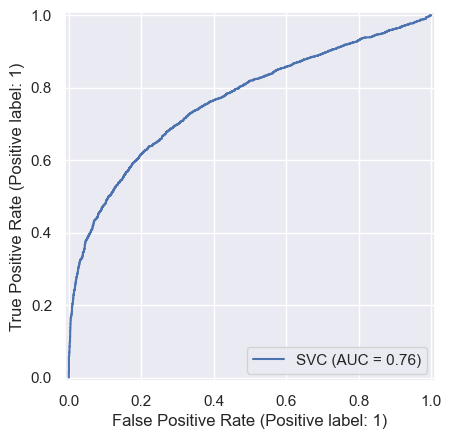

In [42]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix <a name="12"></a>

[1738, 2132, 601, 995]

--- Classification Metrics ---
True Positives (TP): 1738
True Negatives (TN): 2132
False Positives (FP): 601
False Negatives (FN): 995
----------------------------



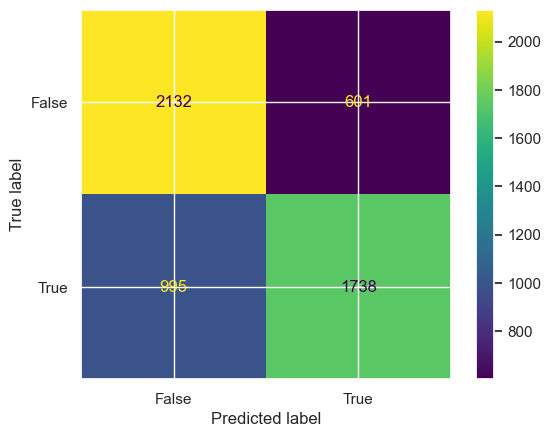

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# # Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN 
# Use .ravel() to flatten the 2x2 matrix into a 1x4 array: [TN, FP, FN, TP]
TN, FP, FN, TP = confusion_matrix.ravel()
conf_matrix_list = [TP, TN, FP, FN]

# Print the list with metrics
print(conf_matrix_list)

# Print the metrics
print("\n--- Classification Metrics ---")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print("----------------------------\n")

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

[<a href="#content">Back to top</a>]

# MCC <a name="13"></a>

In [44]:
import math

def matthews_corr_coeff(TP: int, TN: int, FP: int, FN: int) -> float:
    """
    Calculates the Matthews Correlation Coefficient (MCC).

    MCC is a metric used to evaluate the quality of binary classifications.
    It takes into account true positives, true negatives, false positives, 
    and false negatives, making it a reliable measure even for imbalanced classes.

    The formula is:
    MCC = (TP * TN - FP * FN) / sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN))

    Args:
        TP (int): True Positives (correctly predicted positive cases).
        TN (int): True Negatives (correctly predicted negative cases).
        FP (int): False Positives (incorrectly predicted positive cases).
        FN (int): False Negatives (incorrectly predicted negative cases).

    Returns:
        float: The Matthews Correlation Coefficient, ranging from -1 (worst) 
               to +1 (best). Returns 0.0 if the denominator is zero.
    """
    
    # Calculate the numerator: (TP * TN) - (FP * FN)
    numerator = (TP * TN) - (FP * FN)
    
    # Calculate the components of the denominator
    # Note: These components are the marginal sums (sums of rows/columns in the confusion matrix)
    term_1 = TP + FP
    term_2 = TP + FN
    term_3 = TN + FP
    term_4 = TN + FN
    
    # Calculate the denominator: sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN))
    denominator = math.sqrt(term_1 * term_2 * term_3 * term_4)
    
    # Handle the case where the denominator is zero (which means one of the marginal
    # sums is zero, indicating an ill-defined problem or a trivial prediction). 
    # In this case, MCC is conventionally set to 0.
    if denominator == 0:
        print("Warning: Denominator is zero. Returning MCC = 0.0")
        return 0.0
    
    # Calculate the final MCC value
    mcc = numerator / denominator
    return mcc

# tp1, tn1, fp1, fn1 = [9090, 6115, 1966, 3201]
tp1, tn1, fp1, fn1 = conf_matrix_list
mcc1 = matthews_corr_coeff(tp1, tn1, fp1, fn1)
print(f"---  Model ---")
print(f"TP={tp1}, TN={tn1}, FP={fp1}, FN={fn1}")
print(f"MCC: {mcc1:.4f}\n")

---  Model ---
TP=1738, TN=2132, FP=601, FN=995
MCC: 0.4204



[<a href="#content">Back to top</a>]

# Classification Report <a name="14"></a>

In [45]:
# Classification report 
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.68      0.78      0.73      2733
Inactive (target 0)       0.74      0.64      0.69      2733

           accuracy                           0.71      5466
          macro avg       0.71      0.71      0.71      5466
       weighted avg       0.71      0.71      0.71      5466



[<a href="#content">Back to top</a>]